<a href="https://colab.research.google.com/github/saraisabella0206-ctrl/INTEGRACION-DE-DATOS-Y-PROSPECTIVA-/blob/main/Reto_1_Fallas_tecnol%C3%B3gicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reto 1: Gestión riesgo operacional FINTECH**

En este espacio de trabajo se plantea como caso de estudio el análisis de los riesgos operacionales de una FINTECH. Estos están relacionados con los fallos tecnológicos en transacciones de sus clientes a través de sus canales electrónicos.

Para lo anterior, se describen las siguientes variables:

- Frecuencia = indica el número de transacciones fallidas
- Severidad (expresada en millones) = indica el costo por cada transacción fallida.
- Distribución agregada de las pérdidas (LDA) = producto entre la frecuencia y la severidad.

Finalmente, se presenta la caracterización de esta distribución utilizando las medidas de tendencia central (media y desviación) y las medidas de dispersión (coeficiente de asimetría, Kurtosis) para sacar conclusiones.


0. Cargar las librerías de trabajo

In [6]:
import numpy as np
import pandas as pd #Librería para manejo datos
import seaborn as sns #Librería para el trabajo estadístico
import matplotlib.pyplot as plt #Librería

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Cargar los archivos de trabajo

<function matplotlib.pyplot.show(close=None, block=None)>

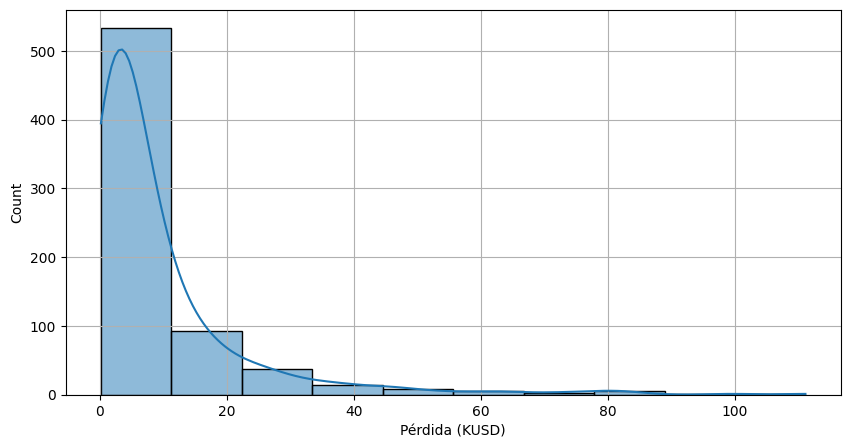

In [8]:
nxl= "/content/drive/MyDrive/Colab Notebooks/Excels/1. FallasTecnológicas.xlsx"
XDB=pd.read_excel(nxl, sheet_name=0)
XDB.head(10)


#Procedemos con las construcción de la distribución agregada de las pérdidas
#Omite la fila de encabezado (índice 0) y convierte las columnas a flotante para asegurar operaciones numéricas
Freq=XDB.iloc[1:,3].astype(float)
Sev=XDB.iloc[1:,4].astype(float)
LDA=Freq*Sev

#Se procede con la construcción de la distribución agregada de las pérdidas
plt.figure(figsize=(10,5))
sns.histplot(LDA, bins=10, kde= True)
plt.xlabel("Pérdida (KUSD)")
plt.grid()
plt.show

2. Clusterización estadística

In [9]:
np.set_printoptions(suppress=True)
NI= 10 #Nro de clusters
counts,bin_edges = np.histogram(LDA,bins=NI)
print("El número de datos por intervalo es:")
print(counts)
print("Los intervalos inferiores:")
print(bin_edges[:-1])
print("Los intervalos superiores:")
print(bin_edges[1:])
XC = (bin_edges[:-1]+ bin_edges[1:])/2

El número de datos por intervalo es:
[533  93  37  14   9   5   3   5   1   1]
Los intervalos inferiores:
[ 0.1423  11.23637 22.33044 33.42451 44.51858 55.61265 66.70672 77.80079
 88.89486 99.98893]
Los intervalos superiores:
[ 11.23637  22.33044  33.42451  44.51858  55.61265  66.70672  77.80079
  88.89486  99.98893 111.083  ]


In [10]:
#Se configura la tabla de los datos
Tabla = np.column_stack((bin_edges[:-1], bin_edges[1:],XC, counts))
df=pd.DataFrame(Tabla,columns=['Límite inferior','Límite superior','Centroide','N datos X intervalo'])
print(df)

   Límite inferior  Límite superior   Centroide  N datos X intervalo
0          0.14230         11.23637    5.689335                533.0
1         11.23637         22.33044   16.783405                 93.0
2         22.33044         33.42451   27.877475                 37.0
3         33.42451         44.51858   38.971545                 14.0
4         44.51858         55.61265   50.065615                  9.0
5         55.61265         66.70672   61.159685                  5.0
6         66.70672         77.80079   72.253755                  3.0
7         77.80079         88.89486   83.347825                  5.0
8         88.89486         99.98893   94.441895                  1.0
9         99.98893        111.08300  105.535965                  1.0


3. Se calculan las métricas estadísticas de tendencia central y dispersión: Media, Desviación, Asimetría y Curtosis

In [11]:
#La media
u= np.mean(LDA)

#La varianza
var= np.var(LDA)

#La desviación
sigma=np.std(LDA)

T2= np.column_stack((u,var,sigma))
df2= pd.DataFrame(T2,columns=['Media','Varianza','Desviación'])
print(df2)

      Media    Varianza  Desviación
0  9.451113  187.894776   13.707472


In [12]:
from scipy.stats import skew, kurtosis

# Calculate skewness
skewness = skew(LDA)

# Calculate kurtosis
kurt = kurtosis(LDA)

T3 = np.column_stack((skewness, kurt))
df3 = pd.DataFrame(T3, columns=['Asimetría', 'Curtosis'])
print(df3)

   Asimetría   Curtosis
0    3.34836  14.167714


In [13]:
#Junto todas las métricas estadísticas en un solo DataFrame
T_final = np.concatenate((T2, T3), axis=1)
df_final = pd.DataFrame(T_final, columns=['Media', 'Varianza', 'Desviación', 'Asimetría', 'Curtosis'])
print(df_final)


      Media    Varianza  Desviación  Asimetría   Curtosis
0  9.451113  187.894776   13.707472    3.34836  14.167714


**Análisis de resultados**

Para esta FINTECH se concluye que las pérdidas por fallos tecnológicos presentan un promedio bajo (9.45 millones), pero son variables, como lo muestran la desviación estándar (13.71) y la varianza (187.89).

Por otra parte, la asimetría de 3.35 indica que la mayoría de las pérdidas son pequeñas, lo cual también se observa en el histograma, donde hay mayor concentración en valores bajos. Además, la curtosis de 14.17 confirma la presencia de eventos poco frecuentes pero de gran impacto.

En conclusión, aunque las pérdidas usuales son bajas, existe riesgo de pérdidas grandes, por lo que deben considerarse en la gestión del riesgo operacional.

